# Business Analysis with Exploratory Data Analysis & Statistics

You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

This project will include and answer the following questions:

#### Section 01: Exploratory Data Analysis
* Are there any null values or outliers? How will you wrangle/handle them?
* Are there any variables that warrant transformations?
* Are there any useful variables that you can engineer with the given data?
* Do you notice any patterns or anomalies in the data? Can you plot them?

#### Section 02: Data Visualization

* Which marketing campaign is most successful?
* What does the average customer look like for this company?
* Which products are performing best?
* Which channels are underperforming?


#### Section 03: Statistical Analysis
* What factors are significantly related to the number of store purchases?
* Does US fare significantly better than the Rest of the World in terms of total purchases?
* Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? 

#### Section 04: Conclusions and Recommendations






### Exploratory Data Analysis

In [6]:
#Import the libraries that we will be using
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm 
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('marketing_data.csv')

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


Data Cleaning:


In [9]:
#Remove spaces from the header 
df.columns = df.columns.str.strip()
df.columns.tolist()

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

In [10]:
#Check for null values
df.isnull().sum()
#We can see that Income has 24 null values so we drop them 
df = df[df['Income'].notna()]
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [11]:
#Get a statistical description of our data
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.150271,0.009477
std,3249.376275,11.985554,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.357417,0.096907
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8421.750000,1977.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#Convert Income into numerical
#First remove the '$' symbol
df['Income'] = df['Income'].str.replace('$', '')
#Then remove the ','
df['Income'] = df['Income'].str.replace(',', '').astype('float')
#df.head()

In [13]:
df['Total_Children'] = df.Kidhome + df.Teenhome

In [14]:
df['Age'] = 2014 - df.Year_Birth  #The data was collected in 2014 
bins = [18, 26, 40, 56, 70]
labels = ['18-26', '26-40', '40-56', '56-70']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False, include_lowest = True)

In [15]:
#Create a new column of the total of Products and the total of Purchases
df['Total_Products'] = df.MntWines + df.MntFruits + df.MntMeatProducts + df.MntFishProducts + df.MntGoldProds + df.MntSweetProducts
df['Total_Purchases'] = (df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumStorePurchases'] +
                            df['NumCatalogPurchases'])

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Children,Age,Age_group,Total_Products,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,0,1,0,SP,0,44,40-56,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,1,1,0,CA,0,53,40-56,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,US,1,56,56-70,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,0,0,0,0,AUS,2,47,40-56,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,0,0,1,0,SP,1,25,18-26,91,8


In [16]:
#Create a new column with the total campaign acceptance
df['Total_CampAccepted'] = df.AcceptedCmp1 + df.AcceptedCmp2 + df.AcceptedCmp3 + df.AcceptedCmp4 + df.AcceptedCmp5


Plot the Income distribution and check for outliers: 

Text(0, 0.5, 'Count')

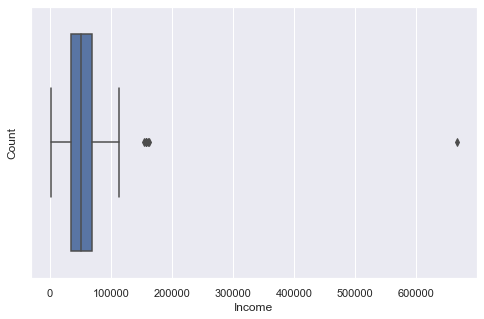

In [17]:
plt.figure(figsize=(8,5))
sns.set_theme()
sns.boxplot(df.Income)
plt.ylabel('Count')

We can notice some outliers in the Income column so we're removing the values where Income is more than $200'000  

In [18]:
df = df[df.Income < 200000]


Plot the Age disribution and check for outliers:

Text(0, 0.5, 'Count')

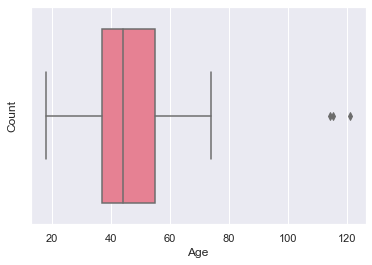

In [19]:
sns.set_theme()
sns.boxplot(df.Age, palette = 'husl' )
plt.ylabel('Count')

There are also some outliers of age more than 100 so we are removing them too. 

In [20]:
df = df[df.Age < 100]

Plot the total Purchase distribution:

Text(0, 0.5, 'Count')

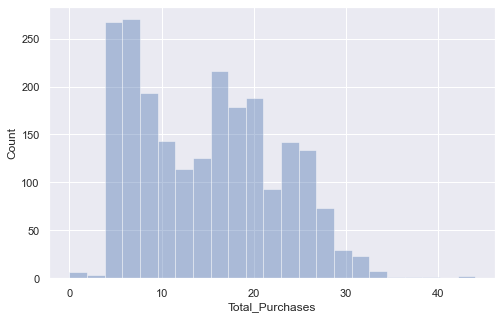

In [21]:
plt.figure(figsize=(8,5))
sns.set_theme()
sns.distplot(df.Total_Purchases, kde = False, hist = True)
plt.ylabel('Count')

### Data Visualization

Visualize the relation of Income with Total Products by highlighting the amount of Gold Products:

<AxesSubplot:xlabel='Income', ylabel='Total_Products'>

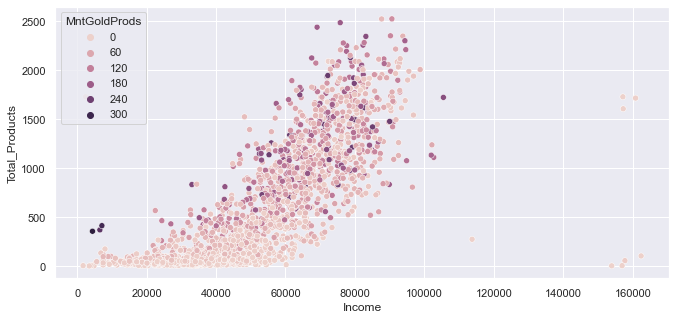

In [22]:
plt.figure(figsize = (11,5))
sns.scatterplot(data=df, x='Income', y='Total_Products', hue = 'MntGoldProds')


Visualize the relation of Income with Total Products by highlighting the amount of Fish Products:

<AxesSubplot:xlabel='Income', ylabel='Total_Products'>

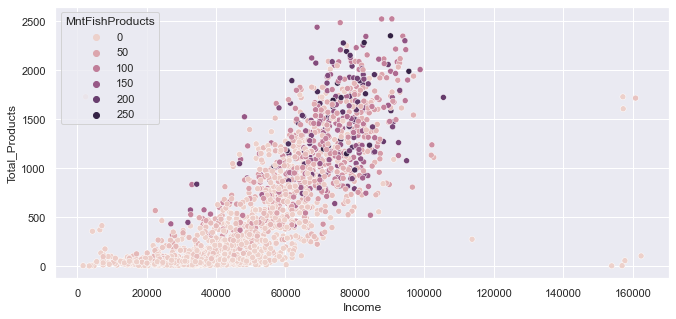

In [19]:
plt.figure(figsize = (11,5))
sns.scatterplot(data=df, x='Income', y='Total_Products', hue = 'MntFishProducts')



In [45]:
#ads=df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Country']]
#ads.apply(pd.value_counts).plot(kind='bar', 
#                                     title='Accepted Campaigns', plot='Country')

Text(0.5, 1.0, 'Marital Status')

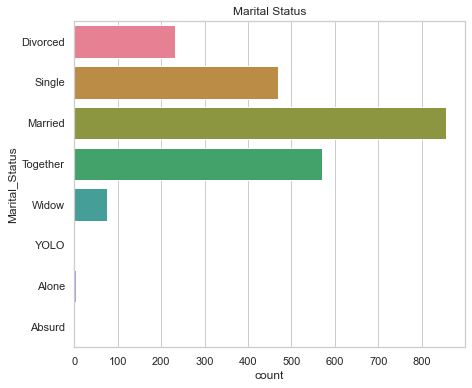

In [21]:
plt.figure(figsize=(7,6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(y= 'Marital_Status', data = df, orient = 'h', palette= 'husl')
plt.title('Marital Status')

<AxesSubplot:xlabel='Age_group', ylabel='count'>

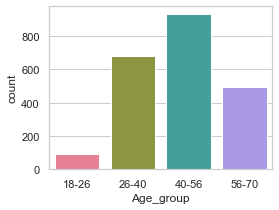

In [22]:
plt.figure(figsize=(4,3))
sns.countplot(x='Age_group', data = df, palette= 'husl')


Text(0.5, 0, 'Number of Children')

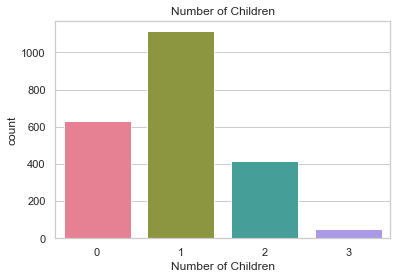

In [23]:
#plt.figure(figsize=(7,6))
sns.countplot(x= 'Total_Children', data = df, palette= 'husl')
plt.title('Number of Children')
plt.xlabel('Number of Children')

Text(0.5, 1.0, 'Education')

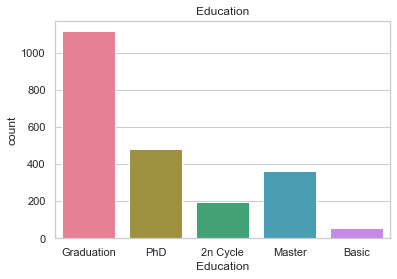

In [24]:
sns.countplot(x= 'Education', data = df, palette= 'husl')
plt.title('Education')

In [25]:
df.Recency.mean()

49.019439421338156

What does the average customer look like for this company?


* Graduated 
* 1 child 
* 40-56 years old 
* Married 
* Household income of $50'000(avg)
* Made a purchase in the last 49 days

##### Which products are performing best?

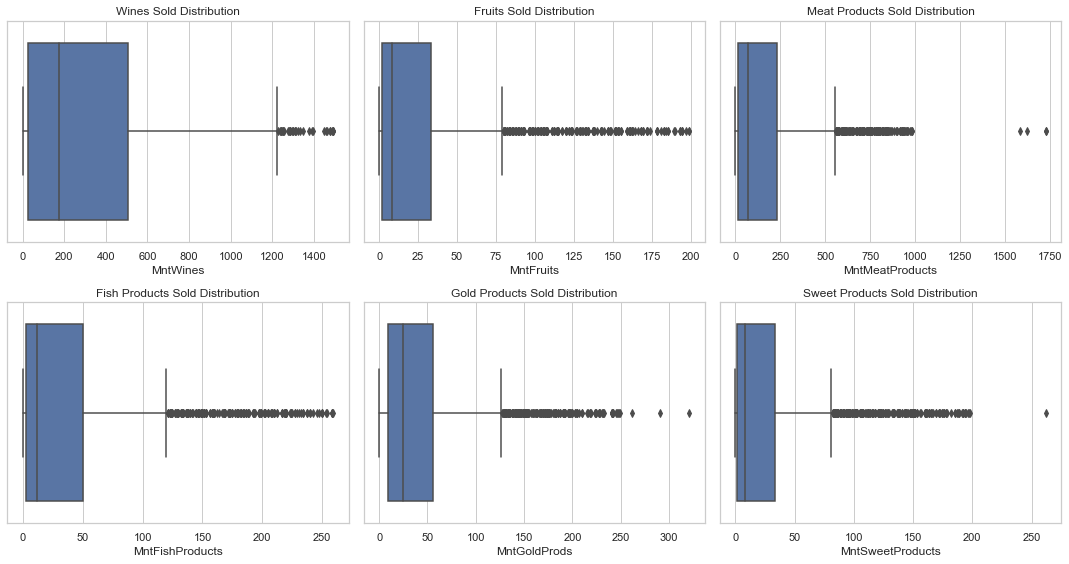

In [26]:
f, ax = plt.subplots(2,3, figsize = (15,8))

x1 = sns.boxplot(df.MntWines, ax=ax[0, 0])
x2 = sns.boxplot(df.MntFruits, ax=ax[0, 1])
x3 = sns.boxplot(df.MntMeatProducts, ax=ax[0,2])
x4 = sns.boxplot(df.MntFishProducts, ax=ax[1,0])
x5 = sns.boxplot(df.MntGoldProds, ax=ax[1,1])
x6 = sns.boxplot(df.MntSweetProducts, ax=ax[1,2])

x1.set_title('Wines Sold Distribution')
x2.set_title('Fruits Sold Distribution')
x3.set_title('Meat Products Sold Distribution')
x4.set_title('Fish Products Sold Distribution')
x5.set_title('Gold Products Sold Distribution')
x6.set_title('Sweet Products Sold Distribution')
plt.tight_layout()


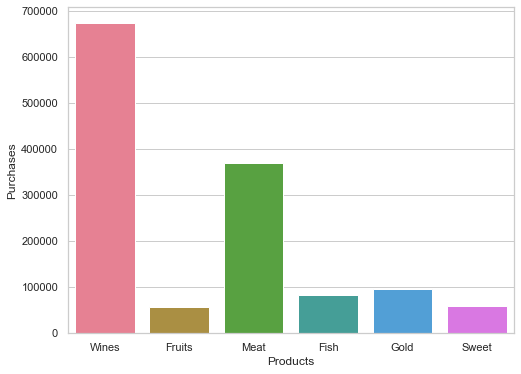

In [27]:
plt.figure(figsize = (8, 6))
product = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntSweetProducts']].agg([sum])

sns.barplot(x = product.T.index, y = product.T['sum'], palette= 'husl')
plt.gca().set_xticklabels(['Wines', 'Fruits', 'Meat', 'Fish', 'Gold', 'Sweet'])
plt.xlabel('Products')
plt.ylabel('Purchases')
plt.show()

In [28]:
print('wine ' + str(df.MntWines.mean()))
print('fruit ' + str(df.MntFruits.mean()))
print('meat ' + str(df.MntMeatProducts.mean()))
print('Fish ' + str(df.MntFishProducts.mean()))
print('Gold ' + str(df.MntGoldProds.mean()))
print(df.MntSweetProducts.mean())

wine 305.2875226039783
fruit 26.329566003616637
meat 167.02983725135624
Fish 37.64873417721519
Gold 43.92585895117541
27.046564195298373


The average customer spent: 
* 305 dollars on wine, 
* 26 on fruits, 
* 167 on meat, 
* 37 on fish, 
* 43 on gold and 
* 27 on sweets

##### Which channels are performing better?

Stores have the highest number of purchases.

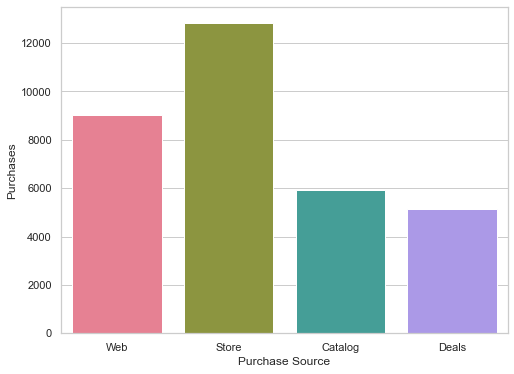

In [29]:
plt.figure(figsize = (8, 6))
purchase_source =  pd.DataFrame(df[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases', 'NumDealsPurchases']].agg([sum]))

sns.barplot(x = purchase_source.T.index, y = purchase_source.T['sum'], palette = 'husl')
plt.gca().set_xticklabels(['Web', 'Store', 'Catalog', 'Deals'])
plt.xlabel('Purchase Source')
plt.ylabel('Purchases')
plt.show()

#### Which country has more purchases?

Mexico has the highest number of total purchases. 

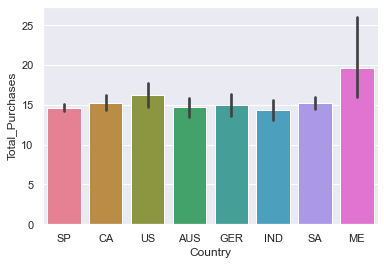

In [35]:
graph = sns.barplot(data = df, x='Country', y='Total_Purchases', palette= 'husl')


#### Which country has more clients?

As can be seen from the plot, Spain has more customers than other countries. 

<AxesSubplot:xlabel='Country', ylabel='count'>

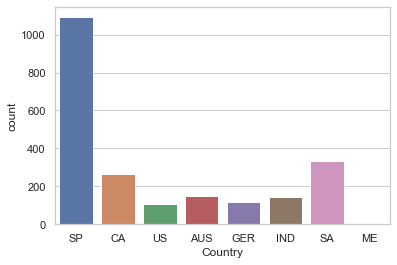

In [31]:
sns.countplot(data = df, x='Country')

### Statistical Analysis

##### Which marketing campaign is most successful?


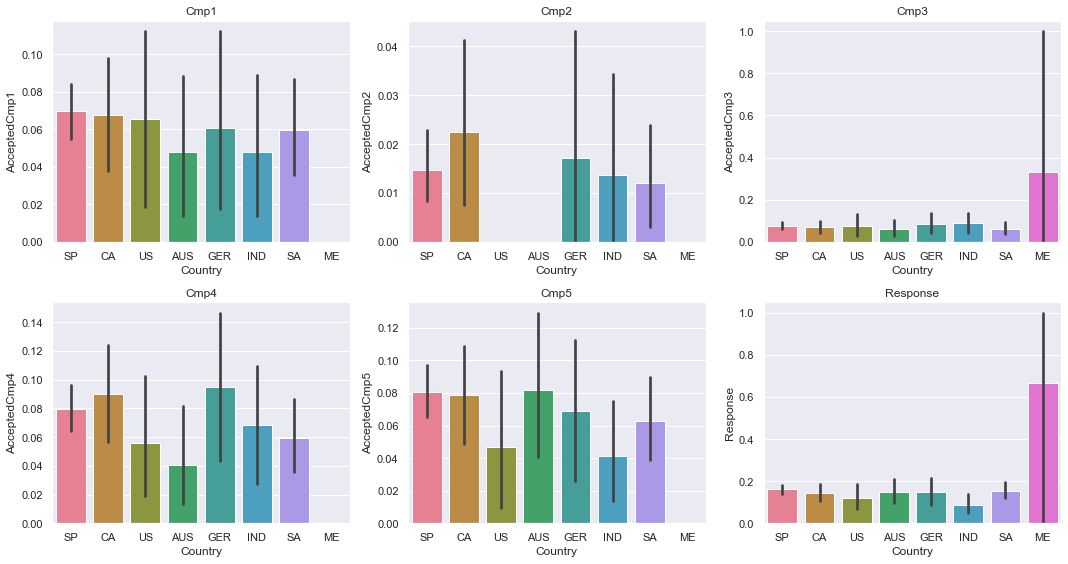

In [60]:
f, ax = plt.subplots(2,3, figsize = (15,8))

x1 = sns.barplot(data = df, x='Country', y='AcceptedCmp1', palette= 'husl', ax=ax[0, 0])
x2 = sns.barplot(data = df, x='Country', y='AcceptedCmp2', palette= 'husl', ax=ax[0, 1])
x3 = sns.barplot(data = df, x='Country', y='AcceptedCmp3', palette= 'husl', ax=ax[0,2])
x4 = sns.barplot(data = df, x='Country', y='AcceptedCmp4', palette= 'husl', ax=ax[1,0])
x5 = sns.barplot(data = df, x='Country', y='AcceptedCmp5', palette= 'husl', ax=ax[1,1])
x6 = sns.barplot(data = df, x='Country', y='Response', palette= 'husl', ax=ax[1,2])

x1.set_title('Cmp1')
x2.set_title('Cmp2')
x3.set_title('Cmp3')
x4.set_title('Cmp4')
x5.set_title('Cmp5')
x6.set_title('Response')
plt.tight_layout()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'AcceptedCmp1'),
  Text(1, 0, 'AcceptedCmp2'),
  Text(2, 0, 'AcceptedCmp3'),
  Text(3, 0, 'AcceptedCmp4'),
  Text(4, 0, 'AcceptedCmp5'),
  Text(5, 0, 'Response')])

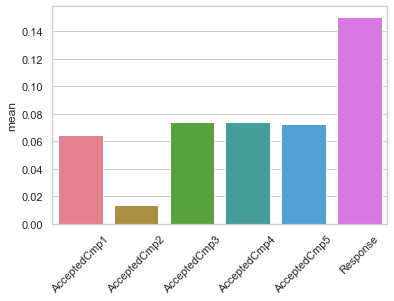

In [32]:
campaign = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].agg(['mean']))

sns.barplot(x = campaign.T.index, y = campaign.T['mean'], palette = 'husl')
plt.xticks(rotation = 45)


Let's calculate each of the values for a better comparison:

In [33]:
 
print(df.AcceptedCmp1.value_counts())
print(df.AcceptedCmp2.value_counts())
print(df.AcceptedCmp3.value_counts())
print(df.AcceptedCmp4.value_counts())
print(df.AcceptedCmp5.value_counts())
print(df.Response.value_counts())
print('Cmp1 has '+ str(142/(2079+142)*100) + '% acceptance')
print('Cmp2 has '+ str(30/(2182+30)*100) + '% acceptance')
print('Cmp3 has '+ str(163/(2049+163)*100) + '% acceptance')
print('Cmp4 has '+ str(164/(2048+164)*100) + '% acceptance')
print('Cmp5 has '+ str(161/(2051+161)*100) + '% acceptance')
print('Response has '+ str(333/(1879+333)*100) + '% acceptance')

0    2070
1     142
Name: AcceptedCmp1, dtype: int64
0    2182
1      30
Name: AcceptedCmp2, dtype: int64
0    2049
1     163
Name: AcceptedCmp3, dtype: int64
0    2048
1     164
Name: AcceptedCmp4, dtype: int64
0    2051
1     161
Name: AcceptedCmp5, dtype: int64
0    1879
1     333
Name: Response, dtype: int64
Cmp1 has 6.3935164340387205% acceptance
Cmp2 has 1.3562386980108498% acceptance
Cmp3 has 7.368896925858952% acceptance
Cmp4 has 7.414104882459313% acceptance
Cmp5 has 7.2784810126582276% acceptance
Response has 15.054249547920435% acceptance


In the next step we are going to build a correlation matrix to measure the statistical relationship between variables:

<AxesSubplot:>

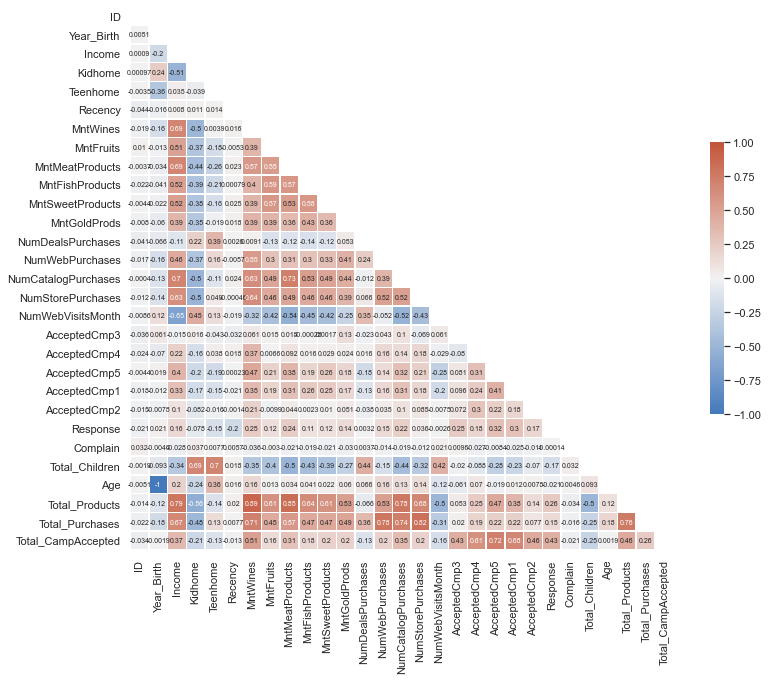

In [34]:
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(13, 10))
cmap = sns.diverging_palette(250, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True, annot_kws={'size':7})


##### Strongest relationships that we can notice from the correlation matrix
How does number of children affects purchases: 
* Nr of deal purchases has a **positive** relation of **0.44** with the _total_ number of children in home.
* Nr of Store Purchases has a **negative** relation of **0.5** with the number of kids in home.
* Sales of meat products have a **negative** relation of **0.5** with the _total_ number of children in home.
* Nr of Catalog Purchases have a **negative** relation of **0.5** with the number of kids in home. 
* Total Products have a **negative** relation of **0.5** with the _total_ number of children in home.

The correlations of Income with the buying channels? 
* Income - Deal Purchases **-0.11**
* Income - Web Purchases **0.46**
* Income - Catalog Purchases **0.7**
* Income - Store Purchases **0.63**





In the next step let's check the amount spent on fish by "Married PhD candidates" compared to other groups.  


In [22]:
df5 = df.groupby(['Education', 'Marital_Status']).MntFishProducts.sum().sort_values(ascending=False).reset_index()
print(df5)

     Education Marital_Status  MntFishProducts
0   Graduation        Married            17820
1   Graduation       Together            12960
2   Graduation         Single            11286
3          PhD        Married             5128
4   Graduation       Divorced             4472
5       Master        Married             3535
6     2n Cycle       Together             3512
7     2n Cycle        Married             3353
8       Master       Together             3048
9       Master         Single             2925
10         PhD       Together             2609
11         PhD         Single             2414
12         PhD       Divorced             1794
13  Graduation          Widow             1676
14    2n Cycle         Single             1454
15      Master       Divorced             1090
16         PhD          Widow              867
17    2n Cycle       Divorced              757
18      Master          Widow              698
19       Basic        Married              559
20    2n Cycl

"Married-PhD candidates" are not the group with the hightest amount spent on fish, "Graduation - Married" are. 


Nest We are going to perform a linear regression to identify variables that significantly affect the number of store purchases.
We are choosing variables that we think we’ll be good predictors for the dependent variable. This can be done by checking the correlations between variables in the correlation matrix plotted above. The fetures that have the highest correlation with the number of store prchases are: Kidhome, Total_Products, MntWines, NumCatalogPurchases, NumWebPurchases, Total_Purchases. 

In [28]:
#X- our independent variable
#Y - our dependent variables
dfr = df
target = pd.DataFrame(df['NumStorePurchases'])
X = dfr[['Kidhome', 'Total_Products', 'MntWines', 'NumCatalogPurchases', 'NumWebPurchases', 'Total_Purchases']]
Y = dfr['NumStorePurchases']

In [29]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      NumStorePurchases   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              8971.
Date:                Sun, 21 Feb 2021   Prob (F-statistic):                        0.00
Time:                        08:14:17   Log-Likelihood:                         -3753.4
No. Observations:                2212   AIC:                                      7519.
Df Residuals:                    2206   BIC:                                      7553.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Kidhome                -0.6771      0.051    -13.226      0.000      -0.778      -0.577
Total_Products          0.0020      0.000     14.902      0.000       0.002       0.002
MntWines               -0.0007      0.000     -3.812      0.000      -0.001      -0.000
NumCatalogPurchases    -0.7516      0.019    -39.962      0.000      -0.789      -0.715
NumWebPurchases        -0.7231      0.019    -38.700      0.000      -0.760      -0.686
Total_Purchases         0.6710      0.008     83.161      0.000       0.655       0.687
==============================================================================
Omnibus:                     1134.780   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15753.622
Skew:                          -2.083   Prob(JB):                         0.00
Kurtosis:                      15.393   Cond. No.                     1.77e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* We can see that the model has a high R-squared value — 0.961, meaning that this model explains 96.1% of the variance in our dependent variable, NumStorePurchases.
* When Number of Kids in home increases by 1, number of store purchases decreases by 0.678. It makes sense because it may be difficult to shop in stores with children.
* As number of catalogue purchases increases by 1, number of store purchases will decrease by 0.7515.
* As number of web purchases increases by 1, number of store purchases will decrease by 0.7232.
* As number of total purchases increase by 1, number of store purchases will increase by 0.6713. This is expected  because total purchases are the sum of store purchases and other channels.
* Total_Products and MntWines are not significant.

### Coclusions and Recommendations

Country with the highest campaign acceptance is Mexico with the most recent marketing campaign, Response. The management might want to follow the same approach with the other campaigns too. 

The marketing campaign with the lowest acceptance is Campaign 2 so it is better to be avoided in the future. 

It is recommended that the representation of parents in the target population is reconsidered because the number of children in home has a relatively strong correlation with nr of store purchases, sales of meat products, nr of catalogue purchases and total products. 

The products that are performing best are wines followed by meat so the next campaigns are recommended to focus on the other products that are selling less. 

The channels that are performing best are stores followed by web but catalogue and deal purchases are underperforming. 

Income has a correlation of 0.7 with catalogue purchases so the marketing team should consider this when advertising.




##### Sources and Acknowledgement:
This data set was provided to students for their final project in order to test their statistical analysis skills as part of a MSc. in Business Analytics. 
Thank you Dr. Omar Romero-Hernandez for providing this data set for your students.
You can find it <a href="https://www.kaggle.com/jackdaoud/marketing-data" target="_blank">here.</a>